In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
import src.dbscan as dbscan
from sklearn.cluster import DBSCAN as skDBSCAN # for comparison

## Initalize Data

In [3]:
data = datasets.make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.05, random_state=40)

In [4]:
def graphWithRadius(c):
    radius = 0.5
    fig, ax = plt.subplots()

    scatter = ax.scatter(data[0][:,0], data[0][:,1], c, cmap='coolwarm')
    colors = scatter.to_rgba(c)

    for point, color in zip(data[0], colors):
        circle = Circle((point[0], point[1]), radius, fill = True, color=color, alpha=0.3)
        ax.add_patch(circle)

    plt.show()

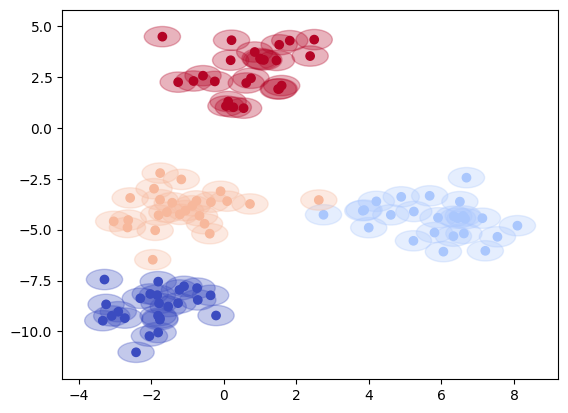

In [5]:
radius = 0.5
fig, ax = plt.subplots()

scatter = ax.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='coolwarm')
colors = scatter.to_rgba(data[1])


for point, color in zip(data[0], colors):
    circle = Circle((point[0], point[1]), radius, fill = True, color=color, alpha=0.3)
    ax.add_patch(circle)

plt.show()

In [6]:
from sklearn.neighbors import NearestNeighbors

eps = 1.5
min_samples = 5

def region_q_nn(X, P, eps):
    o = NearestNeighbors(radius=eps).fit(X).radius_neighbors([P], return_distance=False)[0].tolist()
    print(o)
    return o

db_result = dbscan.dbscan(data[0], eps, min_samples)
db_sk = skDBSCAN(eps=eps, min_samples=min_samples).fit(data[0])

/home/ranyk/.local/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/tmp/ipykernel_23623/3912436441.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[0][:,0], data[0][:,1], c, cmap='coolwarm')


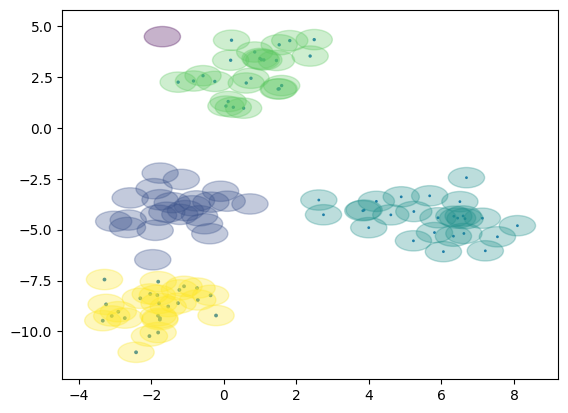

In [7]:
graphWithRadius(db_sk.labels_)

# of clusters of sklearn DBSCAN:  5
# of clusters of Our DBSCAN:  5


/tmp/ipykernel_23623/3912436441.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[0][:,0], data[0][:,1], c, cmap='coolwarm')


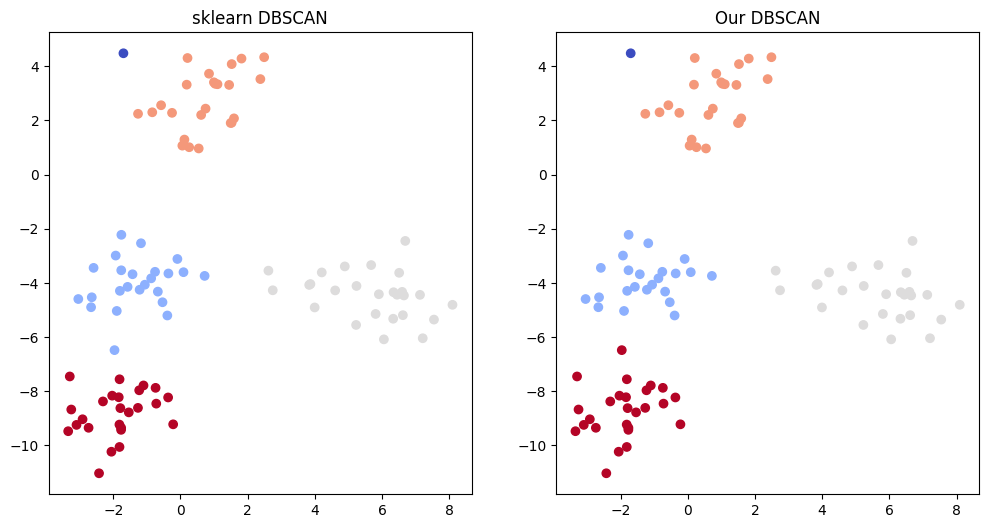

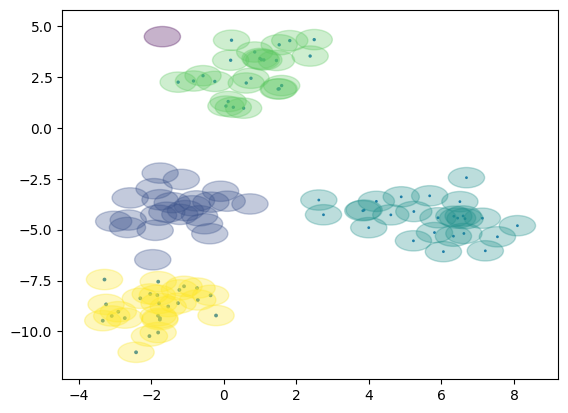

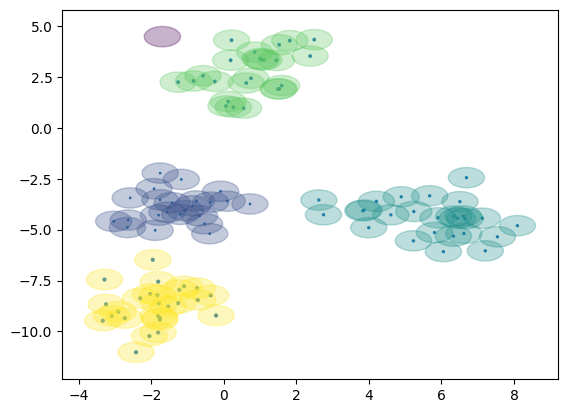

In [8]:
fig, ax  = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(data[0][:,0], data[0][:,1], c=db_sk.labels_, cmap='coolwarm')
ax[0].set_title('sklearn DBSCAN')
print("# of clusters of sklearn DBSCAN: ", len(np.unique(db_sk.labels_)))

ax[1].scatter(data[0][:,0], data[0][:,1], c=db_result, cmap='coolwarm')
ax[1].set_title('Our DBSCAN')
print("# of clusters of Our DBSCAN: ", len(np.unique(db_result)))


graphWithRadius(db_sk.labels_)
graphWithRadius(db_result)

In [9]:
db_result

array([1., 2., 3., 4., 0., 1., 1., 2., 2., 4., 2., 3., 1., 1., 2., 1., 2.,
       4., 1., 3., 1., 2., 2., 2., 1., 4., 1., 1., 3., 4., 4., 3., 3., 4.,
       1., 3., 3., 1., 1., 1., 3., 3., 1., 4., 4., 3., 2., 4., 3., 1., 4.,
       4., 1., 2., 3., 4., 3., 4., 2., 1., 4., 1., 1., 4., 2., 4., 4., 3.,
       2., 2., 2., 3., 3., 4., 3., 4., 2., 4., 3., 3., 4., 2., 4., 1., 4.,
       3., 2., 4., 2., 2., 2., 4., 2., 3., 1., 2., 2., 3., 3., 2.])